In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eergy-efficiency-dataset/ENB2012_data.csv


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.utils import plot_model
import pydot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/kaggle/input/eergy-efficiency-dataset/ENB2012_data.csv")
df.head()


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [5]:
df.isnull().sum()


X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [8]:
df.columns


Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

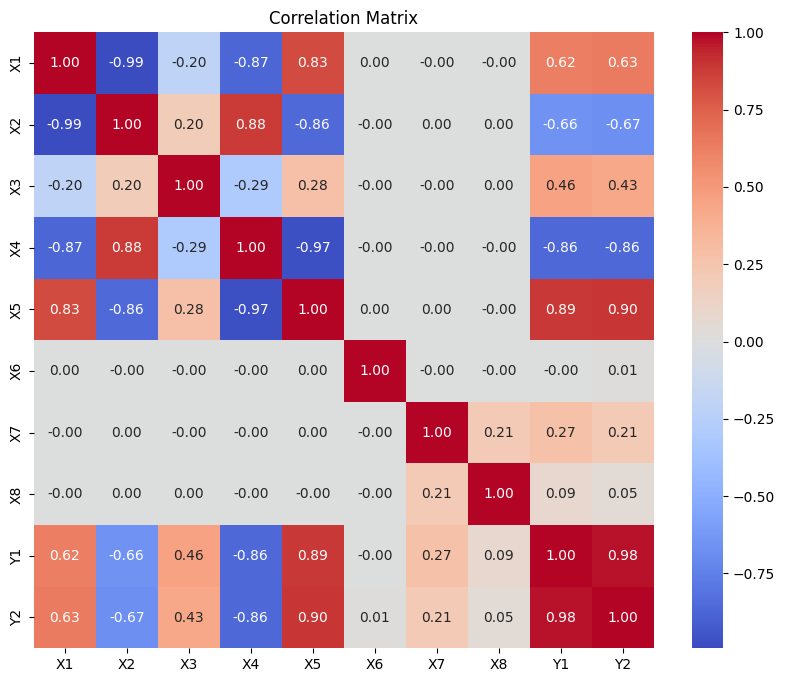

In [9]:
correlation_matrix = df.corr()

#  Visualize  correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

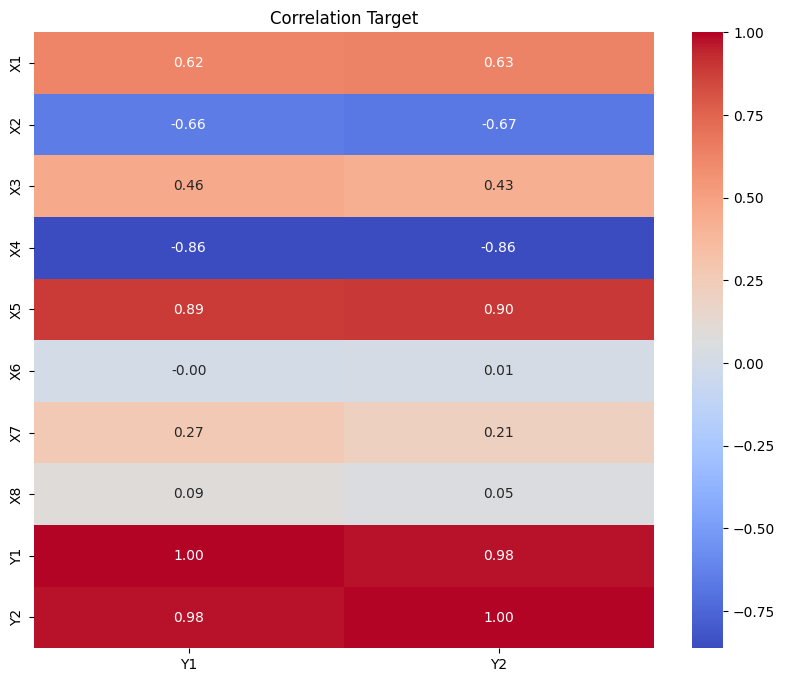

In [10]:
correlation_TARGET= df.corr()[['Y1','Y2']]
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_TARGET, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Target')
plt.show()

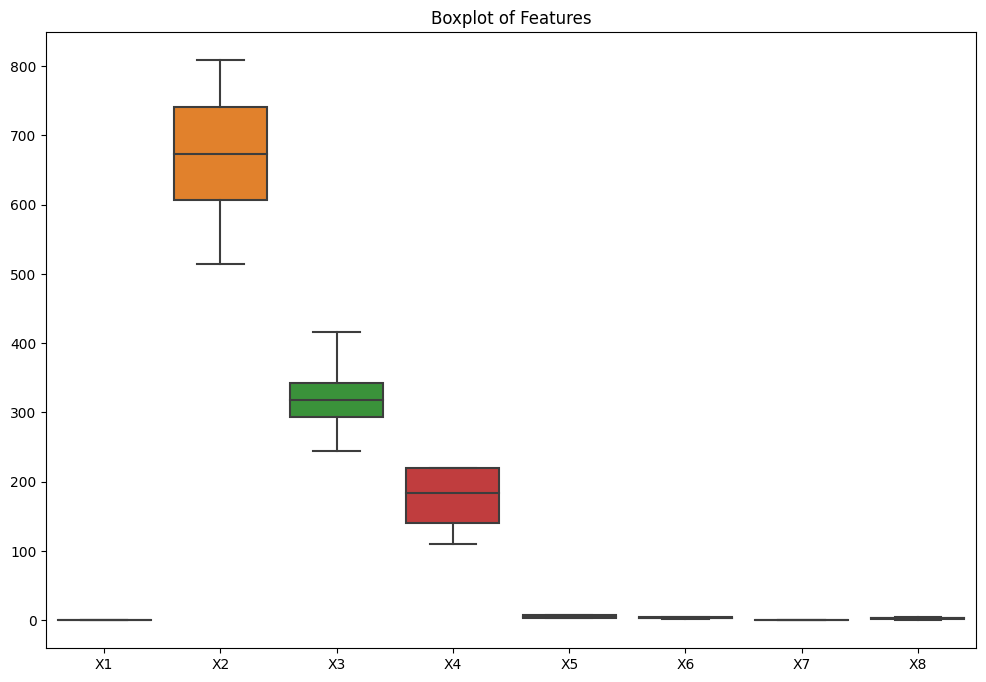

In [12]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']])
plt.title('Boxplot of Features')
plt.show()

In [48]:
X = df[['X1', 'X2', 'X3', 'X4', 'X5','X6', 'X7', 'X8']]
y = df[['Y1', 'Y2']] 

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=42)


In [50]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [51]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Random Forest Model

In [52]:
model = MultiOutputRegressor(RandomForestRegressor( n_estimators= 150,random_state=42))
model.fit(X_train, y_train)

# Predict
y_pred_train = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train, multioutput='raw_values')  # MSE for each output
mae = mean_absolute_error(y_train, y_pred_train, multioutput='raw_values')  # MAE for each output
r2 = r2_score(y_train, y_pred_train, multioutput='raw_values')  # R² score for each output
print('Total MAE '+str(mean_absolute_error(y_train, y_pred_train)))
print('Total MSE '+str(mean_squared_error(y_train, y_pred_train)))
print('Total R '+str(r2_score(y_train, y_pred_train)))

for i in range(len(mse)):
    print(f"Output {i+1}: MSE = {mse[i]:.4f}, MAE = {mae[i]:.4f}, R² = {r2[i]:.4f}")


Total MAE 0.2476505623721897
Total MSE 0.2110838058452625
Total R 0.9976852975893269
Output 1: MSE = 0.0304, MAE = 0.1157, R² = 0.9997
Output 2: MSE = 0.3917, MAE = 0.3796, R² = 0.9957


In [54]:
y_pred_test = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test, multioutput='raw_values')  # MSE for each output
mae = mean_absolute_error(y_test, y_pred_test, multioutput='raw_values')  # MAE for each output
r2 = r2_score(y_test, y_pred_test, multioutput='raw_values')  # R² score for each output
print('Total MAE '+str(mean_absolute_error(y_test, y_pred_test)))
print('Total MSE '+str(mean_squared_error(y_test, y_pred_test)))
print('Total R '+str(r2_score(y_test, y_pred_test)))

for i in range(len(mse)):
    print(f"Output {i+1}: MSE = {mse[i]:.4f}, MAE = {mae[i]:.4f}, R² = {r2[i]:.4f}")


Total MAE 0.6731005747126442
Total MSE 1.3931576287356335
Total R 0.9846372149779172
Output 1: MSE = 0.2448, MAE = 0.3563, R² = 0.9976
Output 2: MSE = 2.5415, MAE = 0.9899, R² = 0.9716


In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importance for each target (each estimator in MultiOutputRegressor)
feature_importances = np.array([est.feature_importances_ for est in model.estimators_])

# Get feature names (if using pandas DataFrame)
feature_names = X_train.columns if hasattr(X_train, "columns") else [f"Feature {i}" for i in range(X_train.shape[1])]

# Print feature importance for each target
for i, target in enumerate(["Output 1", "Output 2"]):  # Adjust if you have more outputs
    print(f"\nFeature importance for {target}:")
    for name, importance in sorted(zip(feature_names, feature_importances[i]), key=lambda x: x[1], reverse=True):
        print(f"{name}: {importance:.4f}")



Feature importance for Output 1:
Feature 0: 0.3610
Feature 1: 0.2126
Feature 3: 0.1599
Feature 4: 0.1358
Feature 6: 0.0793
Feature 2: 0.0347
Feature 7: 0.0159
Feature 5: 0.0008

Feature importance for Output 2:
Feature 0: 0.3873
Feature 4: 0.2511
Feature 1: 0.1274
Feature 3: 0.1159
Feature 6: 0.0494
Feature 2: 0.0402
Feature 7: 0.0161
Feature 5: 0.0126


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV

# Define the base regressor
rf = MultiOutputRegressor(RandomForestRegressor(random_state=42))

# Define parameter grid (note "estimator__" prefix)
param_grid = {
    'estimator__n_estimators': [50,100,125, 150, 200,250],  
    'estimator__max_depth': [5,8,10,15,18, 20],  
    'estimator__min_samples_split': [2,3,5,8, 10],  
    'estimator__min_samples_leaf': [1, 2,3, 4,6]  
}

# Set up GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)


In [56]:
model1 = MultiOutputRegressor(RandomForestRegressor(max_depth= 10, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 150,random_state=42))
model1.fit(X_train, y_train)

# Predict
y_pred_train = model1.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train, multioutput='raw_values')  # MSE for each output
mae = mean_absolute_error(y_train, y_pred_train, multioutput='raw_values')  # MAE for each output
r2 = r2_score(y_train, y_pred_train, multioutput='raw_values')  # R² score for each output
print('Total MAE '+str(mean_absolute_error(y_train, y_pred_train)))
print('Total MSE '+str(mean_squared_error(y_train, y_pred_train)))
print('Total R '+str(r2_score(y_train, y_pred_train)))

for i in range(len(mse)):
    print(f"Output {i+1}: MSE = {mse[i]:.4f}, MAE = {mae[i]:.4f}, R² = {r2[i]:.4f}")


Total MAE 0.29057057440396267
Total MSE 0.29605176271375855
Total R 0.9967516960881226
Output 1: MSE = 0.0395, MAE = 0.1324, R² = 0.9996
Output 2: MSE = 0.5526, MAE = 0.4487, R² = 0.9939


In [57]:
y_pred_test = model1.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test, multioutput='raw_values')  # MSE for each output
mae = mean_absolute_error(y_test, y_pred_test, multioutput='raw_values')  # MAE for each output
r2 = r2_score(y_test, y_pred_test, multioutput='raw_values')  # R² score for each output
print('Total MAE '+str(mean_absolute_error(y_test, y_pred_test)))
print('Total MSE '+str(mean_squared_error(y_test, y_pred_test)))
print('Total R '+str(r2_score(y_test, y_pred_test)))

for i in range(len(mse)):
    print(f"Output {i+1}: MSE = {mse[i]:.4f}, MAE = {mae[i]:.4f}, R² = {r2[i]:.4f}")


Total MAE 0.6807326723699909
Total MSE 1.4344166119905062
Total R 0.9841784518071466
Output 1: MSE = 0.2469, MAE = 0.3588, R² = 0.9976
Output 2: MSE = 2.6219, MAE = 1.0027, R² = 0.9707


In [58]:
X.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], dtype='object')

# Extreme Gradient Boosting Model

In [59]:
from xgboost import XGBRegressor

model4 = MultiOutputRegressor(XGBRegressor(n_estimators=150, learning_rate=0.08, max_depth=10, random_state=42))
model4.fit(X_train, y_train)
# Predict
y_pred_train = model4.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train, multioutput='raw_values')  # MSE for each output
mae = mean_absolute_error(y_train, y_pred_train, multioutput='raw_values')  # MAE for each output
r2 = r2_score(y_train, y_pred_train, multioutput='raw_values')  # R² score for each output
print('Total MAE '+str(mean_absolute_error(y_train, y_pred_train)))
print('Total MSE '+str(mean_squared_error(y_train, y_pred_train)))
print('Total R '+str(r2_score(y_train, y_pred_train)))

for i in range(len(mse)):
    print(f"Output {i+1}: MSE = {mse[i]:.4f}, MAE = {mae[i]:.4f}, R² = {r2[i]:.4f}")


Total MAE 0.015014199289076196
Total MSE 0.000936270359521706
Total R 0.99998976036146
Output 1: MSE = 0.0002, MAE = 0.0086, R² = 1.0000
Output 2: MSE = 0.0017, MAE = 0.0215, R² = 1.0000


In [60]:
y_pred_test = model4.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test, multioutput='raw_values')  # MSE for each output
mae = mean_absolute_error(y_test, y_pred_test, multioutput='raw_values')  # MAE for each output
r2 = r2_score(y_test, y_pred_test, multioutput='raw_values')  # R² score for each output
print('Total MAE '+str(mean_absolute_error(y_test, y_pred_test)))
print('Total MSE '+str(mean_squared_error(y_test, y_pred_test)))
print('Total R '+str(r2_score(y_test, y_pred_test)))

for i in range(len(mse)):
    print(f"Output {i+1}: MSE = {mse[i]:.4f}, MAE = {mae[i]:.4f}, R² = {r2[i]:.4f}")


Total MAE 0.45762882380649955
Total MSE 0.8192659615727175
Total R 0.9909989718756023
Output 1: MSE = 0.1889, MAE = 0.2748, R² = 0.9982
Output 2: MSE = 1.4497, MAE = 0.6404, R² = 0.9838


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define XGBRegressor
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50,100,125,150, 175],
    'learning_rate': [0.01, 0.1, 0.2,.05,.08],
    'max_depth': [5,8,10,12,15],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Grid Search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           scoring='r2', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)


In [61]:
from xgboost import XGBRegressor

model5 = MultiOutputRegressor(XGBRegressor(n_estimators=175, learning_rate=0.2, max_depth=5,colsample_bytree= 1,subsample= 0.8 ,random_state=42))
model5.fit(X_train, y_train)
# Predict
y_pred_train = model5.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train, multioutput='raw_values')  # MSE for each output
mae = mean_absolute_error(y_train, y_pred_train, multioutput='raw_values')  # MAE for each output
r2 = r2_score(y_train, y_pred_train, multioutput='raw_values')  # R² score for each output
print('Total MAE '+str(mean_absolute_error(y_train, y_pred_train)))
print('Total MSE '+str(mean_squared_error(y_train, y_pred_train)))
print('Total R '+str(r2_score(y_train, y_pred_train)))

for i in range(len(mse)):
    print(f"Output {i+1}: MSE = {mse[i]:.4f}, MAE = {mae[i]:.4f}, R² = {r2[i]:.4f}")


Total MAE 0.11215477738643718
Total MSE 0.029427407492229943
Total R 0.9996806735395263
Output 1: MSE = 0.0099, MAE = 0.0742, R² = 0.9999
Output 2: MSE = 0.0489, MAE = 0.1501, R² = 0.9995


In [62]:
y_pred_test = model5.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test, multioutput='raw_values')  # MSE for each output
mae = mean_absolute_error(y_test, y_pred_test, multioutput='raw_values')  # MAE for each output
r2 = r2_score(y_test, y_pred_test, multioutput='raw_values')  # R² score for each output
print('Total MAE '+str(mean_absolute_error(y_test, y_pred_test)))
print('Total MSE '+str(mean_squared_error(y_test, y_pred_test)))
print('Total R '+str(r2_score(y_test, y_pred_test)))

for i in range(len(mse)):
    print(f"Output {i+1}: MSE = {mse[i]:.4f}, MAE = {mae[i]:.4f}, R² = {r2[i]:.4f}")


Total MAE 0.3748977513148867
Total MSE 0.3718289243746099
Total R 0.9959648817328111
Output 1: MSE = 0.1533, MAE = 0.2572, R² = 0.9985
Output 2: MSE = 0.5904, MAE = 0.4926, R² = 0.9934


In [63]:
from xgboost import XGBRegressor

model6 = MultiOutputRegressor(XGBRegressor(reg_lambda=1.0,reg_alpha=0.5,n_estimators=175, learning_rate=0.2, max_depth=5,colsample_bytree= 1,subsample= 0.8 ,random_state=42))
model6.fit(X_train, y_train)
# Predict
y_pred_train = model6.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train, multioutput='raw_values')  # MSE for each output
mae = mean_absolute_error(y_train, y_pred_train, multioutput='raw_values')  # MAE for each output
r2 = r2_score(y_train, y_pred_train, multioutput='raw_values')  # R² score for each output
print('Total MAE '+str(mean_absolute_error(y_train, y_pred_train)))
print('Total MSE '+str(mean_squared_error(y_train, y_pred_train)))
print('Total R '+str(r2_score(y_train, y_pred_train)))

for i in range(len(mse)):
    print(f"Output {i+1}: MSE = {mse[i]:.4f}, MAE = {mae[i]:.4f}, R² = {r2[i]:.4f}")


Total MAE 0.1603383899173854
Total MSE 0.05258440120493086
Total R 0.999434962104879
Output 1: MSE = 0.0272, MAE = 0.1213, R² = 0.9997
Output 2: MSE = 0.0780, MAE = 0.1993, R² = 0.9991


In [64]:
y_pred_test = model6.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test, multioutput='raw_values')  # MSE for each output
mae = mean_absolute_error(y_test, y_pred_test, multioutput='raw_values')  # MAE for each output
r2 = r2_score(y_test, y_pred_test, multioutput='raw_values')  # R² score for each output
print('Total MAE '+str(mean_absolute_error(y_test, y_pred_test)))
print('Total MSE '+str(mean_squared_error(y_test, y_pred_test)))
print('Total R '+str(r2_score(y_test, y_pred_test)))

for i in range(len(mse)):
    print(f"Output {i+1}: MSE = {mse[i]:.4f}, MAE = {mae[i]:.4f}, R² = {r2[i]:.4f}")


Total MAE 0.36723020413826246
Total MSE 0.35655155566010466
Total R 0.9961144017580441
Output 1: MSE = 0.1250, MAE = 0.2501, R² = 0.9988
Output 2: MSE = 0.5881, MAE = 0.4843, R² = 0.9934


## Best model is 6

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importance for each target (each estimator in MultiOutputRegressor)
feature_importances = np.array([est.feature_importances_ for est in model6.estimators_])

# Get feature names (if using pandas DataFrame)
feature_names = X_train.columns if hasattr(X_train, "columns") else [f"Feature {i}" for i in range(X_train.shape[1])]

# Print feature importance for each target
for i, target in enumerate(["Output 1", "Output 2"]):  # Adjust if you have more outputs
    print(f"\nFeature importance for {target}:")
    for name, importance in sorted(zip(feature_names, feature_importances[i]), key=lambda x: x[1], reverse=True):
        print(f"{name}: {importance:.4f}")



Feature importance for Output 1:
Feature 0: 0.8534
Feature 6: 0.1384
Feature 2: 0.0060
Feature 7: 0.0008
Feature 3: 0.0007
Feature 5: 0.0007
Feature 1: 0.0000
Feature 4: 0.0000

Feature importance for Output 2:
Feature 0: 0.8522
Feature 6: 0.0850
Feature 3: 0.0288
Feature 2: 0.0125
Feature 7: 0.0113
Feature 5: 0.0103
Feature 1: 0.0000
Feature 4: 0.0000


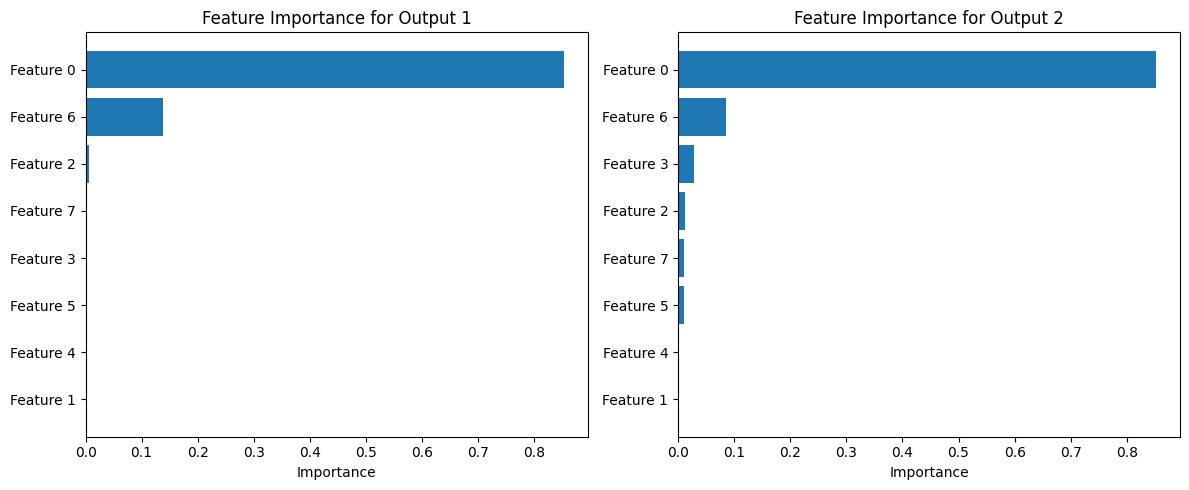

In [66]:
# Plot feature importance for each target
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, target in enumerate(["Output 1", "Output 2"]):  
    sorted_idx = np.argsort(feature_importances[i])[::-1]
    axes[i].barh(np.array(feature_names)[sorted_idx], feature_importances[i][sorted_idx])
    axes[i].set_title(f"Feature Importance for {target}")
    axes[i].set_xlabel("Importance")
    axes[i].invert_yaxis()

plt.tight_layout()
plt.show()


In [ ]:
##############################################################################################################

In [67]:
X=X.drop(['X2','X5'],axis=1)


In [68]:
X.columns

Index(['X1', 'X3', 'X4', 'X6', 'X7', 'X8'], dtype='object')

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=42)


In [70]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [71]:
from xgboost import XGBRegressor

model7 = MultiOutputRegressor(XGBRegressor(reg_lambda=1.0,reg_alpha=0.5,n_estimators=175, learning_rate=0.2, max_depth=5,colsample_bytree= 1,subsample= 0.8 ,random_state=42))
model7.fit(X_train, y_train)
# Predict
y_pred_train = model7.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train, multioutput='raw_values')  # MSE for each output
mae = mean_absolute_error(y_train, y_pred_train, multioutput='raw_values')  # MAE for each output
r2 = r2_score(y_train, y_pred_train, multioutput='raw_values')  # R² score for each output
print('Total MAE '+str(mean_absolute_error(y_train, y_pred_train)))
print('Total MSE '+str(mean_squared_error(y_train, y_pred_train)))
print('Total R '+str(r2_score(y_train, y_pred_train)))

for i in range(len(mse)):
    print(f"Output {i+1}: MSE = {mse[i]:.4f}, MAE = {mae[i]:.4f}, R² = {r2[i]:.4f}")


Total MAE 0.1603383899173854
Total MSE 0.05258440120493086
Total R 0.999434962104879
Output 1: MSE = 0.0272, MAE = 0.1213, R² = 0.9997
Output 2: MSE = 0.0780, MAE = 0.1993, R² = 0.9991


In [72]:
y_pred_test = model7.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test, multioutput='raw_values')  # MSE for each output
mae = mean_absolute_error(y_test, y_pred_test, multioutput='raw_values')  # MAE for each output
r2 = r2_score(y_test, y_pred_test, multioutput='raw_values')  # R² score for each output
print('Total MAE '+str(mean_absolute_error(y_test, y_pred_test)))
print('Total MSE '+str(mean_squared_error(y_test, y_pred_test)))
print('Total R '+str(r2_score(y_test, y_pred_test)))

for i in range(len(mse)):
    print(f"Output {i+1}: MSE = {mse[i]:.4f}, MAE = {mae[i]:.4f}, R² = {r2[i]:.4f}")


Total MAE 0.36723020413826246
Total MSE 0.35655155566010466
Total R 0.9961144017580441
Output 1: MSE = 0.1250, MAE = 0.2501, R² = 0.9988
Output 2: MSE = 0.5881, MAE = 0.4843, R² = 0.9934


In [ ]:
###############################################################################################